<Axes: >

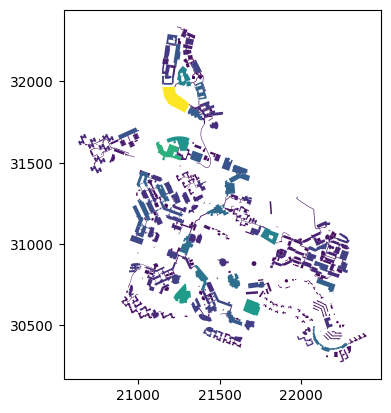

In [3]:
import geopandas as gpd
# Data is not to be in the cloud, plase check with Joie Lim if access is needed
gdf_dt = gpd.read_file(r'C:\Users\felix\Programmieren\CEA_NUS_DT\auxilary\Building_Structures_ 2019\Building Structures 2019 - With Height.shp')
gdf_dt.plot(gdf_dt["geometry"].area)

In [4]:
gdf_dt_buildings = gdf_dt[gdf_dt["Land_Use"] == "Building"]
gdf_dt_buildings

,OBJECTID,Area_SVY21,Point_X,Point_Y,Land_Use,Remarks,DMSLat,DMSLon,Building,Distance,Shape_Leng,Shape_Area,Bld_height,Bld_heig_1,Bld_heig_2,Bld_heig_3,Bld_heig_4,geometry
0,1,8604.812161,103.772089,1.301762,Building,None,01 18 06.34260N,103 46 19.51861E,University Cultural Centre,0.000000,673.833397,8604.812161,0.000000,42.380460,28.073474,28.927462,28.927462,"POLYGON ((21124.695 31629.283, 21124.737 31629..."
1,2,5936.727143,103.777689,1.297083,Building,None,01 17 49.49895N,103 46 39.67991E,University Hall,5.360363,429.662939,5936.727143,0.000000,63.402751,50.218364,50.772751,46.392751,"POLYGON ((21839.618 31072.963, 21864.177 31064..."
2,3,4718.288438,103.774821,1.298484,Building,None,01 17 54.54221N,103 46 29.35535E,Yusof Ishak House,0.000000,548.537738,4718.288438,0.000000,58.812346,47.467310,47.656083,44.706647,"POLYGON ((21478.167 31191.394, 21478.160 31191..."
3,4,7386.633596,103.772876,1.293788,Building,None,01 17 37.63724N,103 46 22.35193E,Kent Ridge Guild House,0.000000,472.108598,7386.633596,0.000000,43.336176,34.408430,40.372402,40.976176,"POLYGON ((21221.137 30663.930, 21221.903 30664..."
4,5,1504.513859,103.773465,1.298599,Building,None,01 17 54.95626N,103 46 24.47245E,Visitor's Lodge,0.000000,259.374496,1504.513859,0.000000,76.766088,46.037769,60.442584,60.442584,"POLYGON ((21344.876 31210.138, 21344.118 31209..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,120,2077.607027,103.780231,1.295107,Building,None,01 17 42.38569N,103 46 48.83038E,Science Library,0.000000,88.174711,417.315504,50.931948,59.337118,53.520791,50.934970,50.931948,"POLYGON ((22119.566 30812.674, 22117.360 30806..."
481,49,2308.785989,103.781063,1.297043,Building,None,01 17 49.35305N,103 46 51.82695E,LT29,0.000000,78.770950,359.652273,19.888661,28.611149,26.016209,25.963525,25.963525,"POLYGON ((22210.589 31040.619, 22196.908 31045..."
482,49,2308.785989,103.781063,1.297043,Building,None,01 17 49.35305N,103 46 51.82695E,LT28,0.000000,86.668320,408.743673,0.000000,28.576692,20.896519,25.963525,0.000000,"POLYGON ((22198.629 31049.897, 22181.373 31056..."
483,49,2308.785989,103.781063,1.297043,Building,None,01 17 49.35305N,103 46 51.82695E,LT27,0.000000,116.549487,712.987230,0.000000,29.698352,25.448667,27.338528,27.338528,"POLYGON ((22179.324 31050.451, 22170.542 31025..."


In [5]:
shape_cea = gpd.read_file(r'C:\Users\felix\Programmieren\CEA_NUS_DT\CEA_model\2030_Baseline\inputs\building-geometry\zone.shp')

<Axes: >

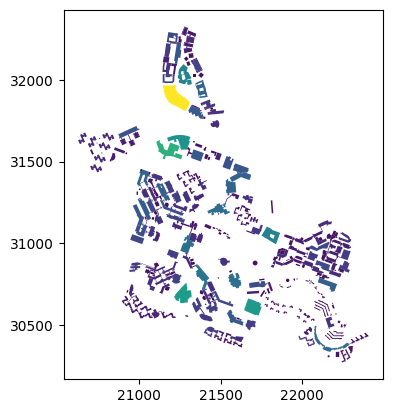

In [6]:
gdf_dt_buildings.plot(gdf_dt_buildings["geometry"].area)

In [7]:
# gdf_dt_buildings.to_file(r'C:\Users\felix\Programmieren\CEA_NUS_DT\auxilary\NUSBuildings.shp', driver="ESRI Shapefile")

In [17]:
shape_cea = shape_cea.to_crs(gdf_dt_buildings.crs)
merged_shapes = gpd.overlay(gdf_dt_buildings ,shape_cea, how='intersection')

In [20]:
merged_shapes.columns

Index(['OBJECTID', 'Area_SVY21', 'Point_X', 'Point_Y', 'Land_Use', 'Remarks',
       'DMSLat', 'DMSLon', 'Building', 'Distance', 'Shape_Leng', 'Shape_Area',
       'Bld_height', 'Bld_heig_1', 'Bld_heig_2', 'Bld_heig_3', 'Bld_heig_4',
       'Name', 'REFERENCE', 'category', 'floors_ag', 'floors_bg', 'height_ag',
       'height_bg', 'geometry'],
      dtype='object')

In [28]:
# Find biggest overlay and drop duplicates 
merged_shapes["area"] = merged_shapes.geometry.area 
merged_shapes.sort_values(by='area', inplace=True)
merged_shapes.drop_duplicates(subset='Name', keep='last', inplace=True)
merged_shapes.drop(columns=['area', 'geometry'], inplace=True)


In [24]:
merged_shapes

,OBJECTID,Area_SVY21,Point_X,Point_Y,Land_Use,Remarks,DMSLat,DMSLon,Building,Distance,...,Bld_heig_3,Bld_heig_4,Name,REFERENCE,category,floors_ag,floors_bg,height_ag,height_bg,geometry
17,8,4418.696374,103.770691,1.300266,Building,None,01 18 00.95871N,103 46 14.48795E,EA,5.198873,...,57.113331,57.113332,B1073,OSM - median values of all buildings,yes,1,1,3,3,"POLYGON ((21060.141 31359.262, 21059.905 31359..."
312,213,1761.054836,103.772135,1.295192,Building,None,01 17 42.69195N,103 46 19.68741E,AS1,0.000000,...,56.028335,0.000000,B1157,OSM - median values of all buildings,yes,1,1,3,3,"POLYGON ((21228.642 30887.458, 21233.687 30885..."
43,17,2789.856752,103.771140,1.298679,Building,None,01 17 55.24432N,103 46 16.10514E,E1,0.000000,...,67.479094,55.685270,B1079,OSM - median values of all buildings,yes,1,1,3,3,"POLYGON ((21085.395 31260.388, 21081.854 31258..."
234,166,39.955927,103.779112,1.294654,Building,None,01 17 40.75315N,103 46 44.80367E,None,0.000000,...,34.410207,0.000000,B1288,OSM - median values of all buildings,yes,1,1,3,3,"POLYGON ((21962.903 30783.298, 21969.975 30785..."
229,160,39.258632,103.778173,1.294330,Building,None,01 17 39.58681N,103 46 41.42397E,None,0.000000,...,0.000000,0.000000,B1273,OSM - median values of all buildings,yes,1,1,3,3,"POLYGON ((21863.732 30741.516, 21861.257 30742..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,4,7386.633596,103.772876,1.293788,Building,None,01 17 37.63724N,103 46 22.35193E,Kent Ridge Guild House,0.000000,...,40.372402,40.976176,B1009,User - Input,yes,2,1,6,3,"MULTIPOLYGON (((21264.819 30733.214, 21276.352..."
547,0,0.000000,0.000000,0.000000,Building,None,None,None,Technology Centre for Offshore and Marine,0.000000,...,63.543587,56.878208,B1290,User - Input,yes,5,1,15,3,"POLYGON ((21739.550 30633.580, 21747.919 30630..."
117,66,6953.464736,103.772749,1.302289,Building,None,01 18 08.24042N,103 46 21.89618E,Yong Siew Toh Conservatory of Music,0.000000,...,28.927462,28.927462,B1026,OSM - as it is,yes,4,0,12,3,"POLYGON ((21308.638 31630.450, 21307.393 31630..."
0,1,8604.812161,103.772089,1.301762,Building,None,01 18 06.34260N,103 46 19.51861E,University Cultural Centre,0.000000,...,28.927462,28.927462,B1006,OSM - as it is,yes,4,1,12,3,"POLYGON ((21174.505 31567.273, 21190.017 31610..."


In [29]:
merged_shapes.to_csv(r'C:\Users\felix\Programmieren\CEA_NUS_DT\auxilary\centroids_mappedheight_names.csv')